[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter the file path for the resume text (.txt): /content/Gaurav_Bisht_2020IPM052.txt
Enter the number of job descriptions: 2
Enter job description 1: Marketing Manager  Job Summary: The Marketing Manager is responsible for developing and executing marketing strategies that will increase brand awareness and drive user acquisition for our voluntary delivery app. The ideal candidate will have a strong understanding of digital marketing, social media, and content marketing.  Responsibilities:  Develop and execute marketing plans that align with the company's overall business goals Manage the company's social media channels and create engaging content Develop and execute email marketing campaigns Work with the product team to develop and launch marketing campaigns Track and analyze marketing metrics to measure the success of campaigns Qualifications:  Bachelor's degree in marketing or a related field 3+ years of experience in digital marketing Strong understanding of social media and conten

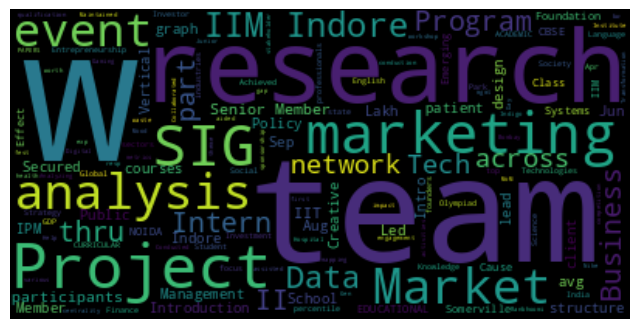


Most similar job description:
Marketing Manager  Job Summary: The Marketing Manager is responsible for developing and executing marketing strategies that will increase brand awareness and drive user acquisition for our voluntary delivery app. The ideal candidate will have a strong understanding of digital marketing, social media, and content marketing.  Responsibilities:  Develop and execute marketing plans that align with the company's overall business goals Manage the company's social media channels and create engaging content Develop and execute email marketing campaigns Work with the product team to develop and launch marketing campaigns Track and analyze marketing metrics to measure the success of campaigns Qualifications:  Bachelor's degree in marketing or a related field 3+ years of experience in digital marketing Strong understanding of social media and content marketing Experience with email marketing Excellent written and verbal communication skills Ability to work independe

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Read the resume text from a .txt file
resume_file_path = input("Enter the file path for the resume text (.txt): ")
with open(resume_file_path, 'r') as file:
    resume_text = file.read()

# Read the job descriptions
job_descriptions = []
num_job_descriptions = int(input("Enter the number of job descriptions: "))
for i in range(num_job_descriptions):
    job_description = input(f"Enter job description {i+1}: ")
    job_descriptions.append(job_description)

# Generate word cloud from the resume text
print("\nGenerating Word Cloud...")
generate_wordcloud(resume_text)

# Tokenize the resume and job descriptions
stop_words = set(stopwords.words("english"))
resume_tokens = [token.lower() for token in word_tokenize(resume_text) if token.lower() not in stop_words]
job_description_tokens = [
    [token.lower() for token in word_tokenize(job_description) if token.lower() not in stop_words]
    for job_description in job_descriptions
]

# Convert the tokens back to strings
resume_processed = " ".join(resume_tokens)
job_descriptions_processed = [" ".join(tokens) for tokens in job_description_tokens]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([resume_processed] + job_descriptions_processed)

# Calculate cosine similarity between the resume and job descriptions
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

# Find the most similar job description
most_similar_index = cosine_similarities.argmax()
most_similar_job = job_descriptions[most_similar_index]

# Print the most similar job description
print("\nMost similar job description:")
print(most_similar_job)
